<a href="https://colab.research.google.com/github/Akshita-Mendon/ML_model/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path='/gdrive/My Drive/ML/'

raw_data=pd.read_csv(path+'titanic.csv')

raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
raw_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data=raw_data.copy()

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(data[['Age']])
data['Age']=imputer.transform(data[['Age']])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data=raw_data.fillna({'Age':raw_data['Age'].mean()})

In [ ]:
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data=data.drop(['Cabin'], axis=1)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
data=data.drop(['PassengerId','Name','Ticket','Embarked'], axis=1)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
sex_enc=LabelEncoder()

In [ ]:
data['Sex']=sex_enc.fit_transform(data['Sex'])

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [ ]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000


<Axes: >

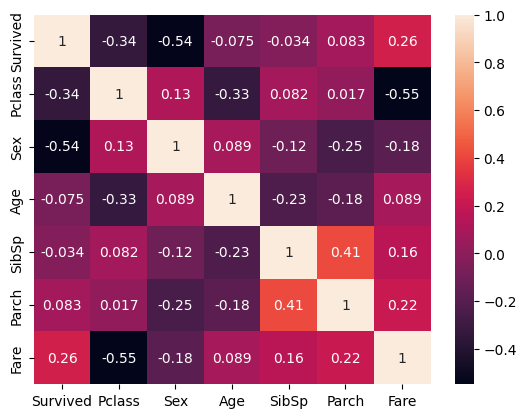

In [ ]:
sns.heatmap(data.corr(), annot=True)

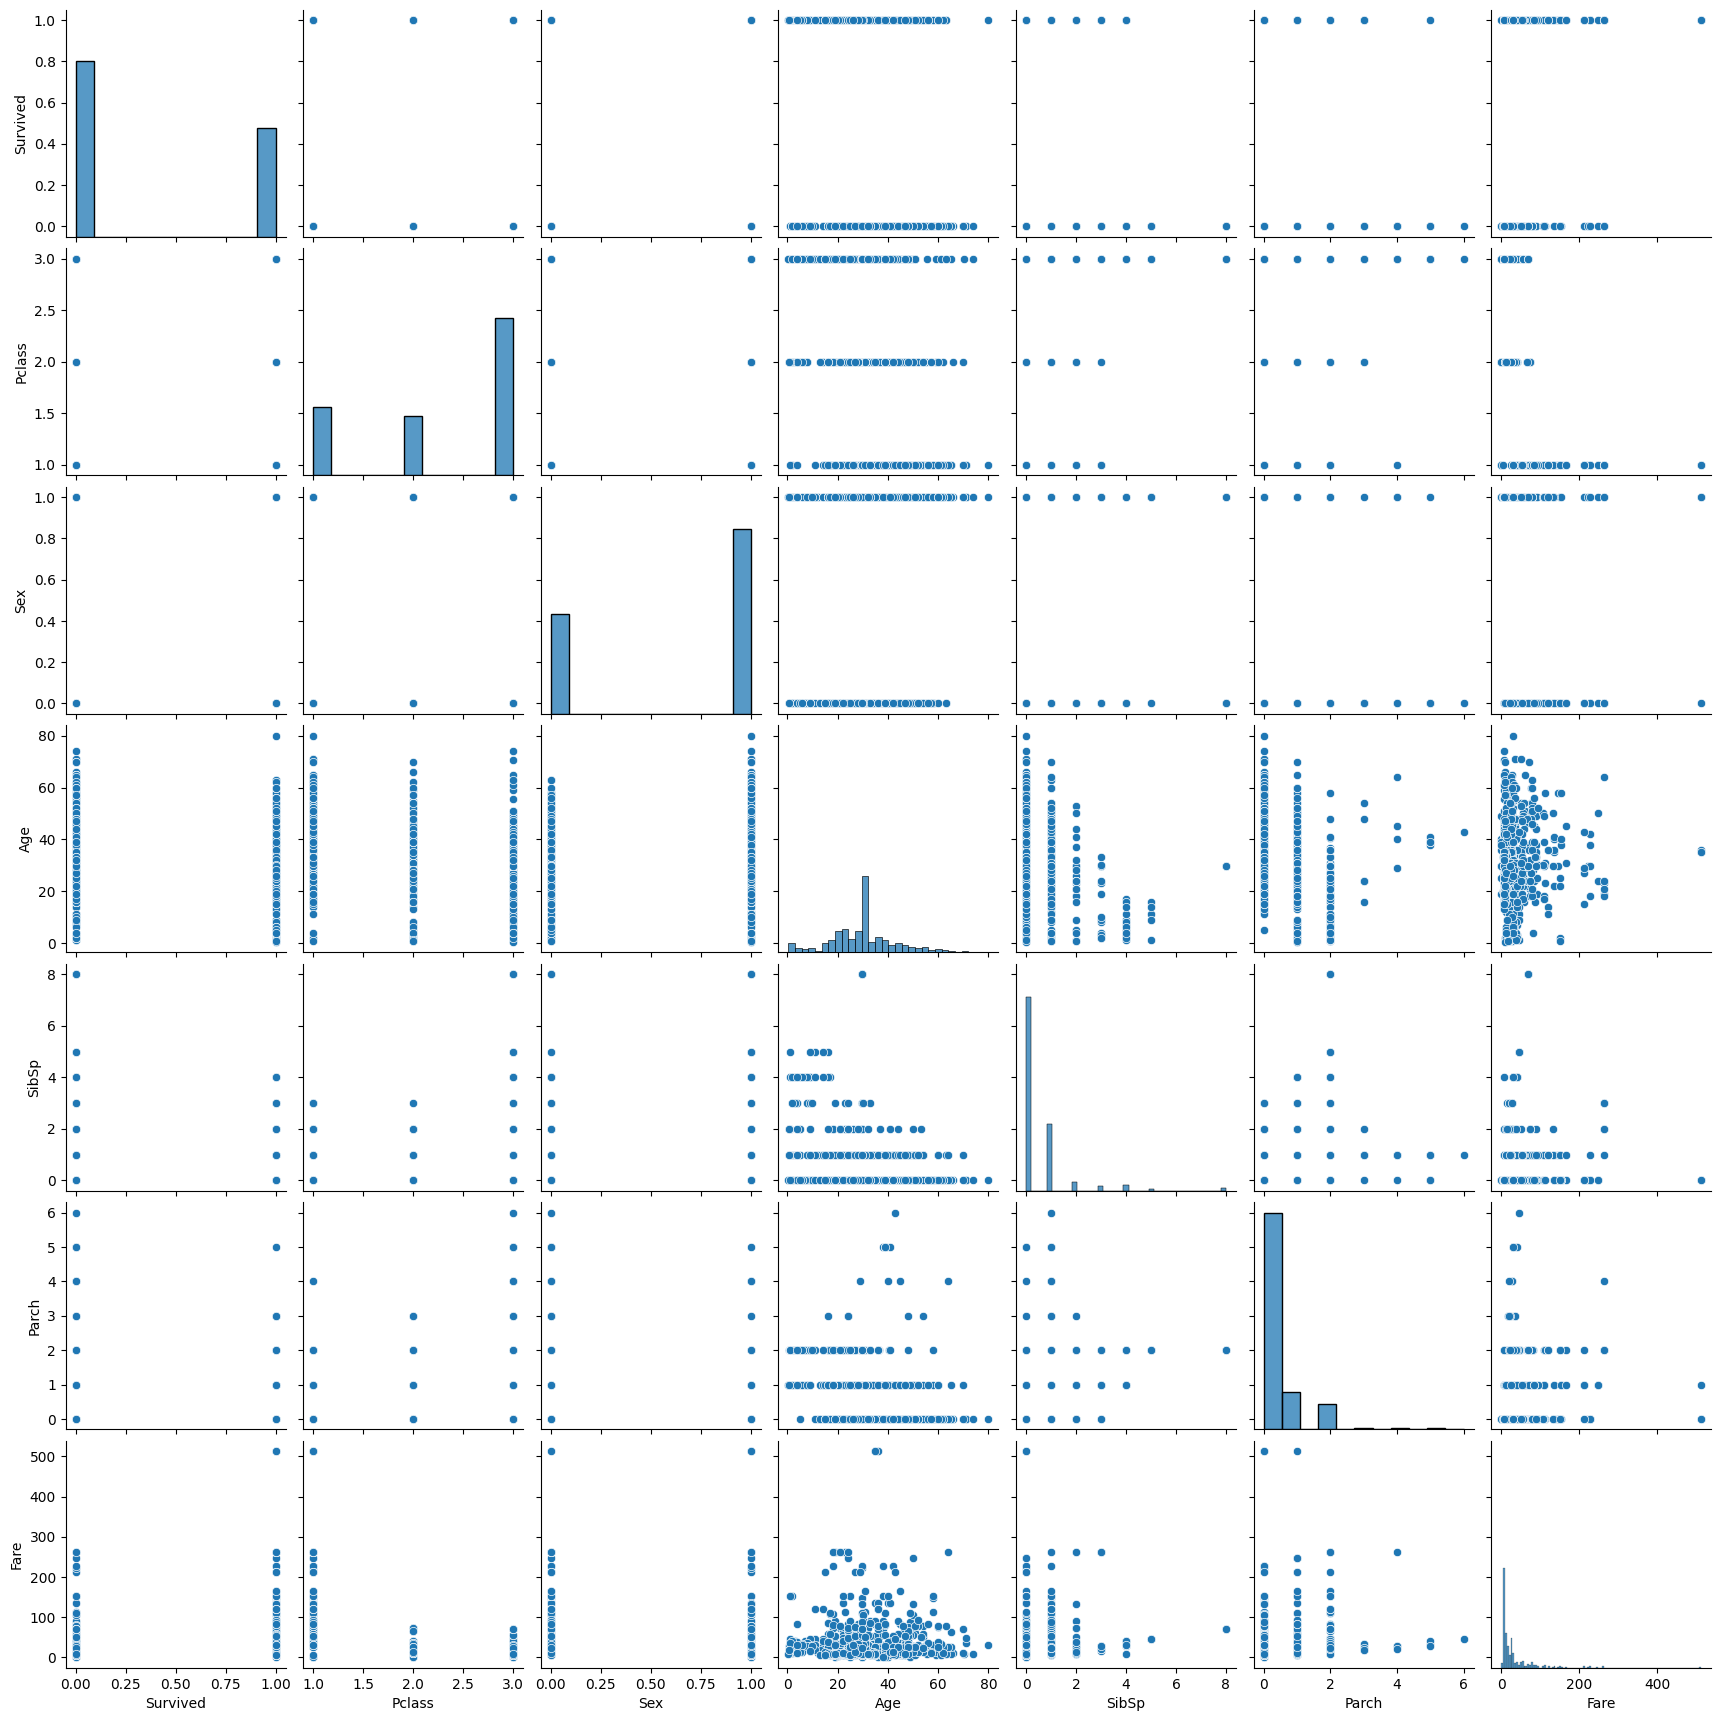

In [ ]:
sns.pairplot(data)

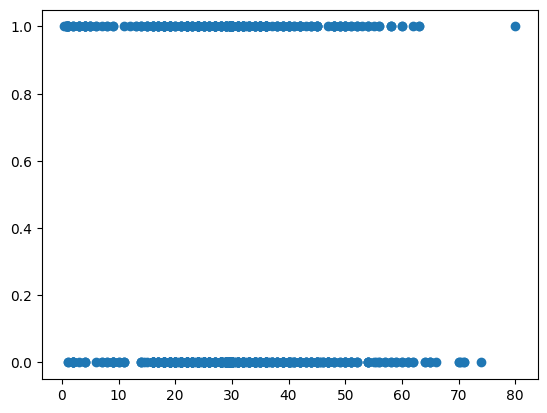

In [ ]:
plt.scatter(data[['Age']], data[['Survived']])

In [ ]:
data=data.drop(['SibSp','Parch'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [ ]:
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
x=data.drop(['Survived'], axis=1)
x.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [ ]:
y=data[['Survived']]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=4)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((622, 4), (267, 4), (622, 1), (267, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(penalty='l2', solver='newton-cg', C=5)

In [ ]:
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=5, solver='newton-cg')

In [ ]:
y_pred_lr=lr_model.predict(x_test)
y_pred_lr

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(y_pred_lr, y_test)
acc_lr

0.7715355805243446

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
model_lr=LogisticRegression(penalty='l2')
val=list(np.arange(0.01,1,0.1))
val
parameters={'solver':('newton-cg','liblinear','sag','saga'),'C':val}
clf_lr= GridSearchCV(model_lr, parameters)
clf_lr.fit(x_train, y_train)

In [ ]:
print(clf_lr.best_params_)

{'C': 0.7100000000000001, 'solver': 'newton-cg'}


In [ ]:
test_pred=clf_lr.predict(x_test)

In [ ]:
acc_lr_gs=accuracy_score(test_pred, y_test)
acc_lr_gs

0.7752808988764045

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred, y_test)

array([[136,  32],
       [ 28,  71]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       164
           1       0.72      0.69      0.70       103

    accuracy                           0.78       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



# KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh= KNeighborsClassifier(n_neighbors=3, algorithm= 'auto', weights='uniform', p=2)

In [ ]:
neigh.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn= neigh.predict(x_test)

In [ ]:
accuracy= accuracy_score(y_test, y_pred_knn)
accuracy

0.6666666666666666

The accuracy score to train KNeighbors Classifier is 66.66%

In [ ]:
from sklearn.model_selection import GridSearchCV
neigh= KNeighborsClassifier(n_neighbors=3)
val=list(np.arange(1,20,1))
val
parameters={'algorithm':('ball_tree','auto','brute','kd_tree'), 'p':val}
clf_knn= GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

In [ ]:
print(clf_knn.best_params_)

{'algorithm': 'auto', 'p': 1}


In [ ]:
test_pred_knn=clf_knn.predict(x_test)

In [ ]:
acc_knn_gs=accuracy_score(test_pred_knn, y_test)
acc_knn_gs

0.7153558052434457

The accuracy score improves and changes to 71.5%

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred_knn, y_test)

array([[131,  43],
       [ 33,  60]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       164
           1       0.65      0.58      0.61       103

    accuracy                           0.72       267
   macro avg       0.70      0.69      0.69       267
weighted avg       0.71      0.72      0.71       267



# Decision Tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion='gini', min_samples_split=2)

In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
clf_dct= clf.predict(x_test)

In [ ]:
accuracy= accuracy_score(y_test, clf_dct)
accuracy

0.8164794007490637

The accuracy score to train Decision Tree is 82.02%

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clf_dct, y_test)

array([[141,  26],
       [ 23,  77]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_dct))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       164
           1       0.77      0.75      0.76       103

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



# Probabilities


In [ ]:
log_probs= clf_lr.predict_proba(x_test)
knn_probs= clf_knn.predict_proba(x_test)
Dtree_probs= clf.predict_proba(x_test)

In [ ]:
# keep probabilities for the positive outcome only
log_probs= log_probs[:, 1]
knn_probs= knn_probs[:, 1]
Dtree_probs= Dtree_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
#fpr--> False positive rate
#tpr--> True positive rate
log_fpr, log_tpr, lr_thres= roc_curve(y_test, log_probs)
knn_fpr, knn_tpr, knn_thres= roc_curve(y_test, knn_probs)
Dtree_fpr, Dtree_tpr, Dtree_thres= roc_curve(y_test, Dtree_probs)

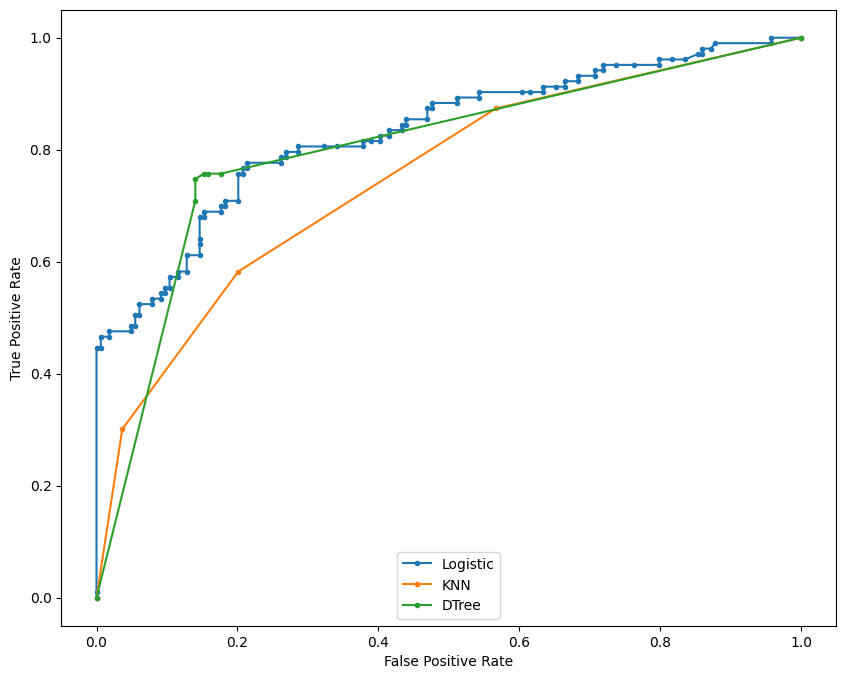

In [ ]:
fig, ax= plt.subplots(figsize=(10, 8))
ax.plot(log_fpr, log_tpr, marker='.', label='Logistic')
ax.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
#axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#show the legend
plt.legend(loc=8)
#show the plot
plt.show()

As the area under the LOGISTIC curve is more as compared to other two hence it is more accurate than other two

In [65]:
from sklearn.metrics import roc_auc_score
#calculate scores
log_auc= roc_auc_score(y_test, log_probs)
knn_auc= roc_auc_score(y_test, knn_probs)
Dtree_auc= roc_auc_score(y_test, Dtree_probs)

print('Logistic: ROC AUC= {} %'.format(round(log_auc, 3)*100))
print('KNN: ROC AUC= {} %'.format(round(knn_auc, 3)*100))
print('DTree: ROC AUC= {} %'.format(round(Dtree_auc, 3)*100))

Logistic: ROC AUC= 83.2 %
KNN: ROC AUC= 75.0 %
DTree: ROC AUC= 80.10000000000001 %


In [83]:
new_pass= np.array([3, 0, 21, 71.28])
type(new_pass)

numpy.ndarray

In [84]:
new_passenger=new_pass.reshape(1, -1)
new_passenger

array([[ 3.  ,  0.  , 21.  , 71.28]])

In [85]:
if clf_lr.predict(new_passenger)==0:
  print("You are Dead")
else:
  print("Yay, You are Alive")

Yay, You are Alive


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
